<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/Day_07/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

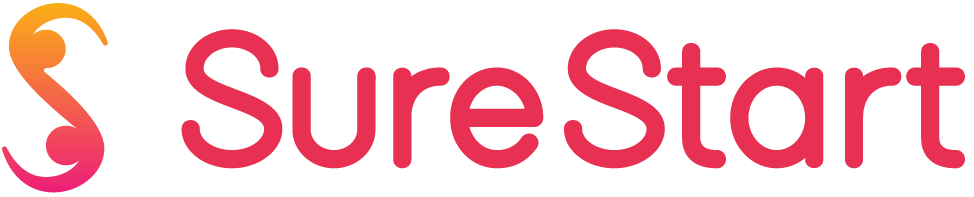

#Day 7 Objectives

* Understand **what optimization algorithms are**, and **how they are used** in the context of deep learning.
* Understand gradient descent, stochastic gradient descent, and mini-batch stochastic gradient descent.
* Understand the roles of batch size, learning rate and other hyper-parameters.
* Implement, using TF2.0, gradient descent and a few variations of it.
* Understand the strengths and weaknesses of the various optimization algorithms covered in this practical.

# Optimization


## What is optimization?

Optimization is the process of comparing a set of items and selecting the best one, based on some metric. So, we can define an optimization algorithm as a program (or series of instructions) that try to find the best item when compared to other items using a given method of comparison (or metric).

In calculus optimization refers to maximizing or minimizing the result of some function. Here we aim to minimize the loss/cost function.

## How do we use it in machine learning?

Optimiaztion algorithms are used in machine learning to compare different values for the parameters of a model and to try to find the best one. For the banana function, the optimization algorithm tries to find the x and y values that lead to the lowest value of the function (here our metric is: "lower values are better"). More practically, optimization algorithms are used to try to find the best values for our neural network weights and biases. In this case, we use a *loss function* as a metric and try to select the weights and biases that lead to the lowest loss function value. But, we don't need to worry about that yet. First, we need to build up some tools that will let us do this.

**Note:** You may be wondering why we need special optimization algorithms at all. For example, the minimum for simpler functions above can be computed analytically. And indeed, for many optimization problems, including some problems in machine learning such as linear regression, it is easy to compute solutions analytically. So why are we spending a whole practical on this topic? The reason is **computational complexity**. There are a huge number of problems, including optimising deep neural networks, for which we cannot find an analytical solution in a reasonable amount of time. In these cases, we need to find approximate solutions to our optimization problems, which is what we will be looking at in this practical.

## Question 1

How are optimizers connected to loss functions?

### Answer 1

Optimizers work on minimizing the loss function by updating the weights during backpropagation.

# Gradient Descent

Gradient descent is the simplest of training algorithms commonly used in deep learning. However, it gives excellent results in many cases, and also forms the basis for many other powerful optimization methods - such as Momentum, RMSProp, and Adam - which we will look at later in this practical. Mathematically we can describe gradient descent as follows:

\begin{equation}
\mathbf{θ}= \mathbf{θ} −\eta \times \nabla_\mathbf{θ} J(\mathbf{θ})
\end{equation}

where $\mathbf{θ}$ are the parameters of the model, $\eta$ (eta) is the learning rate, $J(\mathbf{θ})$ is the loss (also called $\mathcal{L}$), and $\nabla_\theta J(\mathbf{θ})$ is the **gradient** of the loss with respect to the parameters (similarly to ${\nabla f(\mathbf x_0)}$ in the example above). This equation tells us that to update each of the parameters, we scale the gradient for each parameter by the learning rate and subtract it from the corresponding parameter. Or, in pseudo-code:

```
for each epoch:
  grad = calc_grad(loss_func, data, params)  # Calculate gradient of loss wrt parameters
  params = params - learning_rate * grad
```

You might have noticed that we are sweeping a lot of critical details under the rug here! Firstly we are assuming that we can easily calculate the gradients using some `calc_grad` function, and secondly, we are ignoring the issue of batch size (the number of training data points we use to calculate an estimate of the gradient). 

Luckily for us, TensorFlow addresses the first detail thanks to **automatic differentiation** (AD). With AD, calculating the gradients is about as simple as calling a `calc_grad` function, which means that we do not need to worry about the details of *how* to calculate the gradients. We don't need to think much about implementing derivatives for each of our operations, or the backpropagation algorithm, for example. If you want to know more about how this all works, you should check out the *Build your own TensorFlow* tutorial.

In practice, batch size is simply a hyper-parameter that we can tune. However, there are three cases that are worth knowing about:

1.   Using a batch size of $n$, where $n$ is the number of training examples is known as **Batch Gradient Descent (BGD)**. In this case, all of the data is used to calculate the gradient at each step. This results in the *most accurate* estimate of the gradient. If the learning rate is not too high, BGD is guaranteed to converge to:
    * the global minimum for [convex](https://en.wikipedia.org/wiki/Convex_function) optimization surfaces
    * a local minimum for non-convex surfaces (provided that there are no [saddle points](https://en.wikipedia.org/wiki/Saddle_point)).
    
    However, some downsides of BGD are that it is **not compatible with online learning**, where we get new examples during training, and that it can be slow for large training datasets.
    
  **Exercise:** what will happen if we use BGD with too high a learning rate on a convex optimization surface? Will it diverge or find a local minimum? *Hint:* try drawing a diagram.


2.   Using a batch size of 1, called **Stochastic Gradient Descent (SGD)**. In this case, only a single data point is used to calculate an estimate of the gradient. Thus, the estimate is very noisy, and we are not guaranteed to find a minimum (local or global). However, SGD still performs very well in practice and allows for online learning. It also turns out that having noisy estimates of the gradient acts as a form of **regularisation** which can prevent over-fitting. Finally, because we are performing gradient descent with one example at a time, we need much less memory. Not having enough memory can be a significant issue when using BGD.


3.   Using a batch size of $m < n$ is called **Mini-batch Gradient Descent** and is a compromise between batch and stochastic gradient descent. We use $m$ examples to calculate an estimate of the gradient. Thus, we still have *some* noise in the gradient estimate, we can tune the batch size to make good use of memory, and the variance of the gradient estimate is greatly reduced — which leads to better convergence to local or global minima.

In deep learning, we almost always use mini-batch gradient descent. However, it is often referred to simply as SGD.






## Question 2

Is gradient descent the basis of every optimization method? If not, search online and state other means of optimization in machine learning.

### Answer 2


No, because there are also mini-batch and stochastic gradient descent. Additionally, not every learning problem is an optimization problem.

## Optional extra reading: choosing a batch size



You might be wondering how one chooses which batch size to use for a given problem.

One approach is to choose as big a batch size as possible. The reason we might want to do this is that a larger batch size means that our model will train more quickly. This speedup is because modern computer hardware, especially GPUs, are designed with parallelism in mind. In other words, by having a larger batch size, we can take better advantage of our hardware. So in practice, we often choose the largest batch size that will fit into memory.

[According to some research](https://arxiv.org/pdf/1803.09820.pdf), using a larger batch size allows you to select a higher learning rate - which means that your model will train faster. On the other hand, choosing too large a learning rate can lead to not converging to a minimum. So, we still have to tune the batch size.

You can read more about these issues in this [blog post](https://blog.janestreet.com/does-batch-size-matter/) as well as the paper linked above — the paper, in particular, discusses strategies for choosing various hyper-parameters related to optimization in deep learning.

#Learning rate

The size of these steps is called the learning rate. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

#Cost function

A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.

#Bringing it all together

Now let’s run gradient descent using our new cost function. There are two parameters in our cost function we can control: m (weight) and b (bias). Since we need to consider the impact each one has on the final prediction, we need to use partial derivatives. We calculate the partial derivatives of the cost function with respect to each parameter and store the results in a gradient.

Given the cost function:

$f(m,b) = \frac{1}{N}\sum_{i=1}^N(y_i - (m \cdot x_i + b))^2$

The gradient can be calculated as:

$$ f'(m,b) = 
\left[ 
  \begin{matrix} 
  \frac{df}{dm}\\ 
  \frac{df}{db} 
  \end{matrix} 
  \right]
   =
  \left[ 
  \begin{matrix} 
  \frac{1}{N}\sum_{i=1}^N -2x_i(y_i - (m \cdot x_i + b))^2\\ 
  \frac{1}{N}\sum_{i=1}^N -2(y_i - (m \cdot x_i + b))^2 
  \end{matrix} 
  \right]
  $$

To solve for the gradient, we iterate through our data points using our new m and b values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.

## Question 3

When is stochastic gradient descent better than batch gradient descent?

### Answer 3

If we want optimization to happen faster and use less resources, SGD would be better.

Since with SGD, you only take one randomly picked sample, while with BGD you take all the samples.

# Putting it all into practice

Putting all of this into practice is very simple! Keras provides us with a high-level API that makes using any of the optimization methods or learning rate schedules as easy as changing a single line of code. Of course, if you are defining a custom training loop using `tf.GradientTape` then the code we've used above can easily be converted to work for any model and dataset. 

One of the advantages of using Keras is that it provides us with reasonable default values for all of the hyper-parameters of the optimization algorithms. Let's use Keras to train a simple MLP on FashionMNIST so that we can compare the optimization algorithms we've looked at in a more realistic setting.

As a quick reminder, FashionMNIST contains 28x28 grayscale images from 10 different types of clothing. Let's take a quick look:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

4422102/4422102 [==============================] - 0s 0us/step


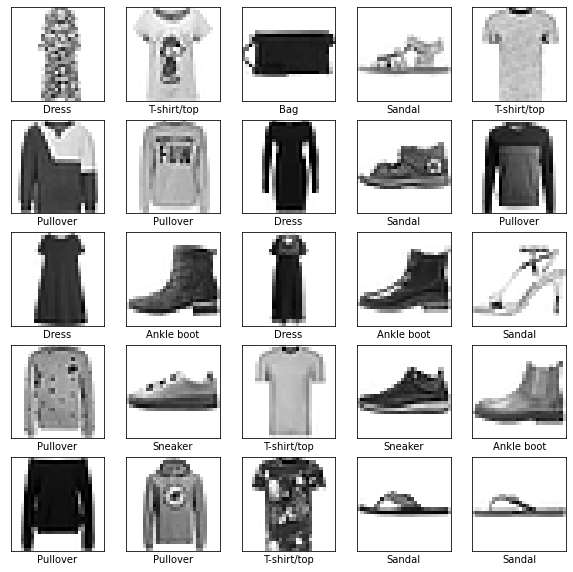

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap="gray_r")
    plt.xlabel(text_labels[train_labels[img_index]])

Before we train on the data, we want to do a little pre-processing. We won't go into detail about how and why we are doing the pre-processing, but if you want to know more, you should take a look at the *Deep Feedforward Networks* practical.

In [3]:
batch_size = 128

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
# Divide image values and cast to float so that they end up as a floating point number between 0 and 1
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))
# Shuffle the examples.
train_ds = train_ds.shuffle(buffer_size=batch_size * 10)
# Now "chunk" the examples into batches
train_ds = train_ds.batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))
test_ds = test_ds.batch(batch_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Now let's define a simple MLP(Multi layer perceptron):

In [4]:
def build_mlp():
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  
  return model

model = build_mlp()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


And finally, lets train the MLP using a few different optimisers and compare the results:

In [5]:
#@title Helper functions (double click to unhide/hide the code)

def make_loss_plots(losses):
  plt.close()
  for label, loss_vals in losses.items():
    plt.plot(loss_vals, label=label)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Loss vs Epoch")
  plt.legend()
  plt.show()

In [7]:
losses = {}
tf.random.set_seed(0)

# SGD
model = build_mlp()
model.compile(optimizer='sgd', 
              # we can use the string shortcut if we 
              # don't want to change the hyper-parameters
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
sgd_hist = model.fit(train_ds, epochs=5,
          validation_data=test_ds)


# Momentum
model = build_mlp()
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
momentum_hist = model.fit(train_ds, epochs=5,
          validation_data=test_ds)

# RMSProp
model = build_mlp()
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9),
              # rho is the symbol used for the forget factor in Keras
              # we used gamma (γ) in this practical
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
rmsprop_hist = model.fit(train_ds, epochs=5,
          validation_data=test_ds)


# Adam
model = build_mlp()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
adam_hist = model.fit(train_ds, epochs=5,
                       validation_data=test_ds)

# SGD with learning rate decay
model = build_mlp()
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(lr=0.5, momentum=0.0, decay=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
sgd_decay_hist = model.fit(train_ds, epochs=5,
          validation_data=test_ds)

# Momentum with learning rate decay
model = build_mlp()
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.5, momentum=0.9, decay=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
sgd_decay_hist = model.fit(train_ds, epochs=5,
          validation_data=test_ds)


Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.1152 - accuracy: 0.6547 - val_loss: 0.7894 - val_accuracy: 0.7355
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.6993 - accuracy: 0.7721 - val_loss: 0.6574 - val_accuracy: 0.7779
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.6090 - accuracy: 0.8012 - val_loss: 0.5989 - val_accuracy: 0.7961
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5619 - accuracy: 0.8150 - val_loss: 0.5667 - val_accuracy: 0.8079


KeyboardInterrupt: ignored

In [ ]:
#Plotting the results
losses['Momentum'] = momentum_hist.history["val_loss"]
losses['RMSProp'] = rmsprop_hist.history["val_loss"]
losses['Adam'] = adam_hist.history["val_loss"]
losses['SGD with decay'] = sgd_decay_hist.history["val_loss"]
losses['Momentum with decay'] = sgd_decay_hist.history["val_loss"]
losses['SGD'] = sgd_hist.history["val_loss"]
make_loss_plots(losses)

**Exercise:** Play with the parameters of the various optimisers and see how that affects this particular problem.

**Note:** There is an element of randomness each time we train our models; this means that we should be careful when making judgements about which methods are best for this problem.

#Visualizing the Convergence of various Optimizers

Source:
http://ruder.io/optimizing-gradient-descent/


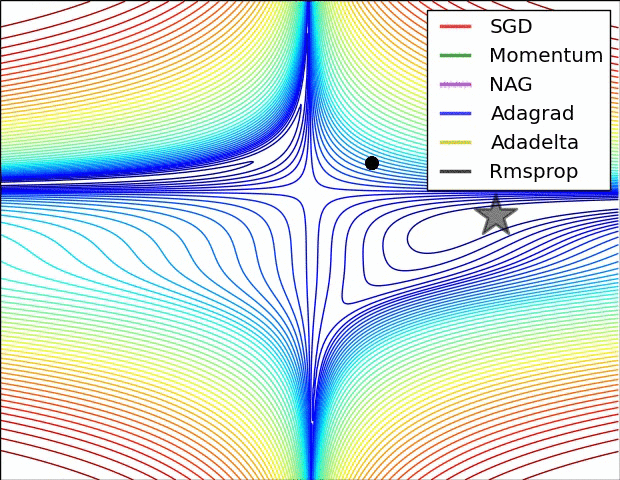

## Question 4

Use the Keras implementation of the AdaGrad optimizer and plot a loss/epochs curve similar to our previous plot. Write your obervations about the loss values of AdaGrad vs the other optimization algorithms. 

### Answer 4

In [ ]:
model = build_mlp()
model.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
adagrad_hist = model.fit(train_ds, epochs=5,
                       validation_data=test_ds)

## Optional extra reading: second-order methods

All of the optimization methods we've looked at in this practical are what we call first order methods: they calculate a straight line estimate of the gradient and take a step in that direction. However, this straight line estimate throws away some useful information about the curvature of our loss surface. In other words, a first order method gives us information about whether or not our loss is increasing or deacresing in a given direction, but a second order method tells us how much it is increasing or decreasing. With this extra information, second order methods can find a minima in fewer steps, and have less trouble with getting stuck in saddle points.

Unfortunately, the benefits of second-order methods come at a cost. As you might have guessed from the names, a first-order method calculates the first derivative of our loss function, while a second-order method also calculates the second derivative. Calculating these second derivatives (the [Hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix)) is computationally expensive, which means that second-order methods are often slower in practice. For this reason, we usually do not see second-order methods in deep learning. However, fast approximations for second-order methods are an active area of research!

Examples of second-order methods include [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) and [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm).

## Question 5

How can activation functions affect optimization?

### Answer 5

\<*Type your answer here*\>

# Conclusion

## What are optimisers, and how do we use them?

Optimisers are algorithms that try to find the best item when compared to other items using a given method of comparison (or metric). In deep learning, we use them to try to find the best values for our weights and biases, using a loss function as our metric.

## What method should you use?

There are **no hard rules** for which methods you should use. It will always depend on your particular model and dataset. However, some guidelines are worth keeping in mind:

1. Adam typically works very well in a large number of settings and is usually a good first choice.
2. RMSProp can often outperform Adam for RNNs as well as in RL. If you are working in either of these domains, then it might be worth trying RMSProp.
3. SGD and SGD with momentum often work just as well as more sophisticated methods like Adam. Don't think that they aren't worth trying out just because they are simple.

#Further Resources


* A [blog post](http://fa.bianp.net/teaching/2018/eecs227at/gradient_descent.html) from Fabian Pedregosa on gradient descent [**Highly Recommended**].
* [Distil.pub post](https://distill.pub/2017/momentum/) by Gabriel Goh on why momentum works [**Highly Recommended**].
* [Sebastian Ruder's blog](http://ruder.io/optimizing-gradient-descent/) on gradient descent algorithms.
* Deep Dive into Deep Learning chapter on [Optimization Algorithms](http://d2l.ai/chapter_optimization/index.html).
* Keras optimizer [docs](https://keras.io/optimizers/).

Other blog posts:

* https://darel13712.github.io/ml/optimizers.html
* http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/


# **Upload this Day 7 Colab Notebook to your Github repository under "Day 7" folder. Also add your *Reflection* on today's learning in README.md**

#Source 
https://github.com/khipu-ai/practicals-2019/blob/master/1b_optimization.ipynb